In [24]:
import pandas as pd

data = pd.read_csv('data/인구현황.csv')
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


4-1 지역별 총 인구수 top5

In [23]:
data.loc[data['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop) # Malgun Gothic
matplotlib.rc('font',family=font_prop)



Malgun Gothic


C:\Users\user\AppData\Local\Temp\ipykernel_7880\92721637.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


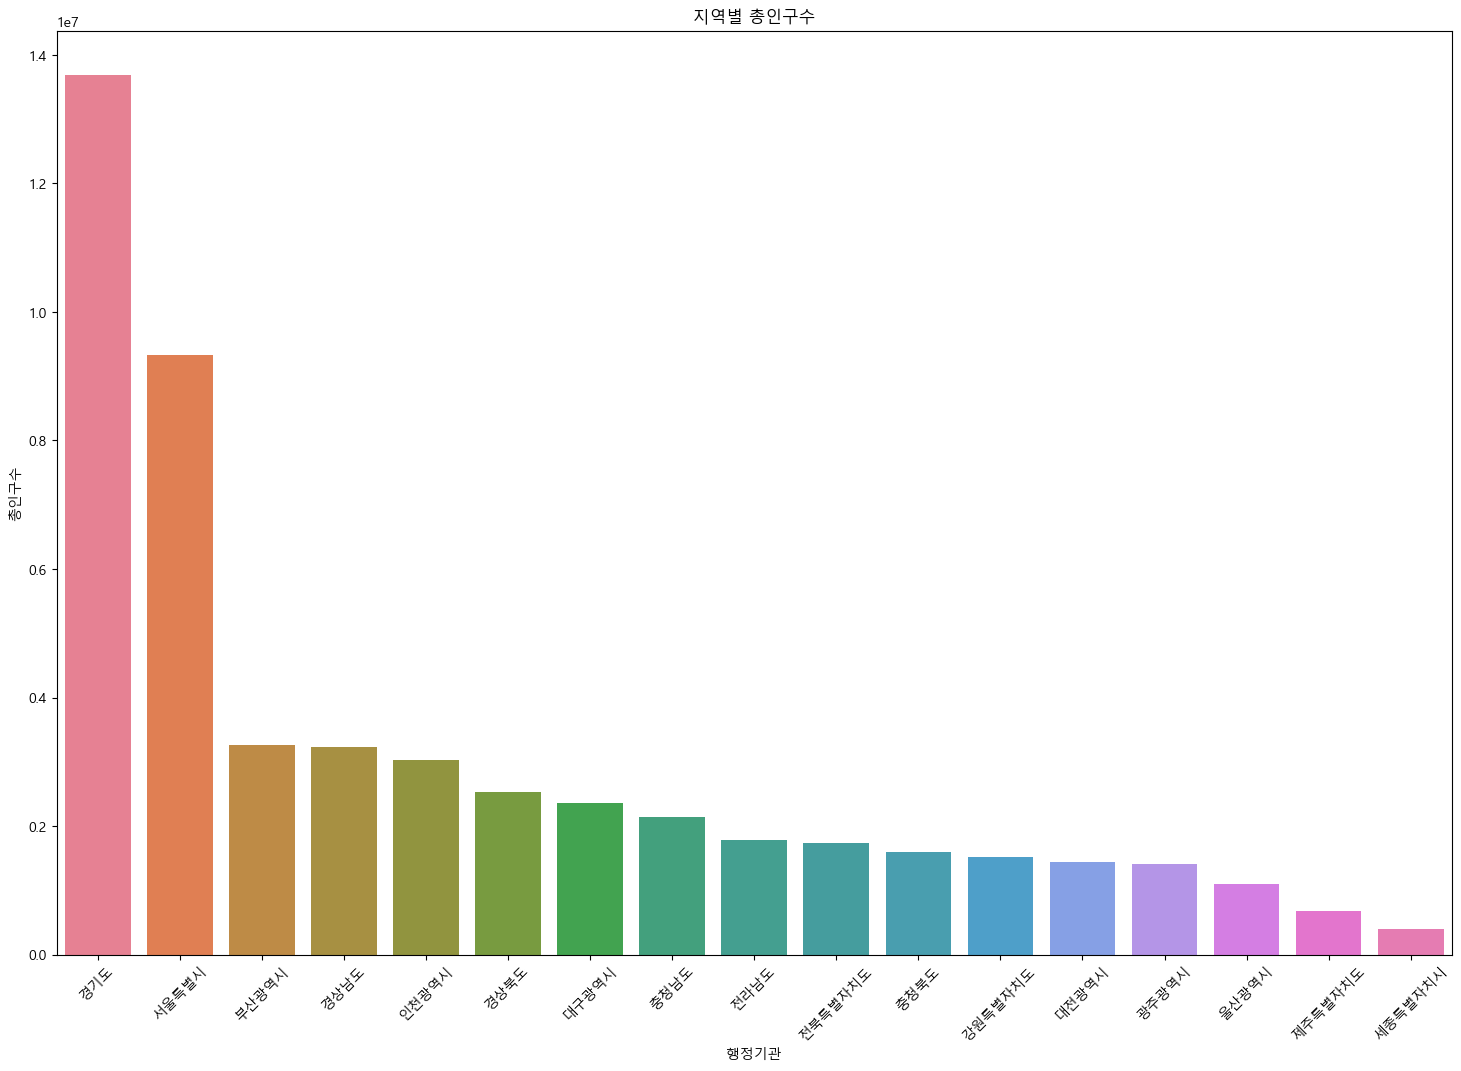

In [45]:

data1 = data.loc[data['행정기관'] != '전국']


def make_plot(ylabel):
    figure, axes1 = plt.subplots(1,1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(data=data1.sort_values(by=ylabel,ascending=False), x='행정기관',y=ylabel, ax=axes1, hue='행정기관')
    pop_plot.set_title(f'지역별 {ylabel}')
    pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)

    if ylabel == '남여 비율':
        plt.axhline(y=1.0,color = 'red',linestyle='--', linewidth=1, label = '남여 비율 1:1')
    plt.show()

make_plot('총인구수')

2. 세대당 인구수 높은 지역 Top5

In [32]:
data1[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head().reset_index(drop=True)


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


C:\Users\user\AppData\Local\Temp\ipykernel_7880\797862906.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


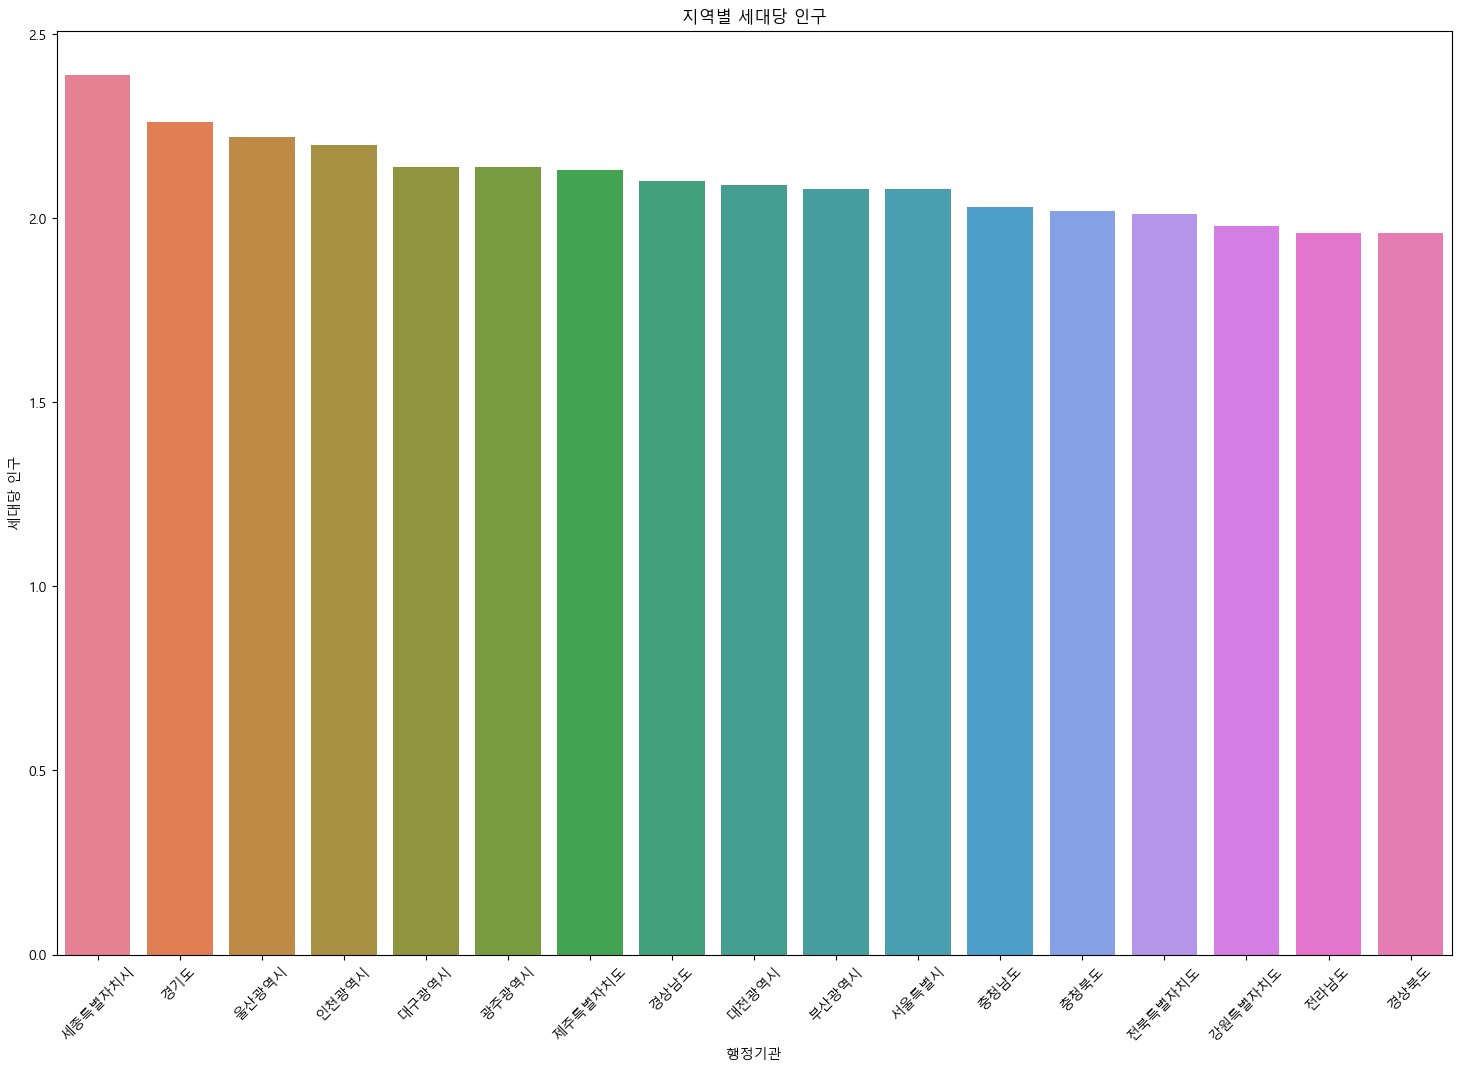

In [36]:
make_plot('세대당 인구')

3. 남녀비율 분석

In [37]:
data1[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).head().reset_index(drop=True)


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02


C:\Users\user\AppData\Local\Temp\ipykernel_7880\92721637.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=45)


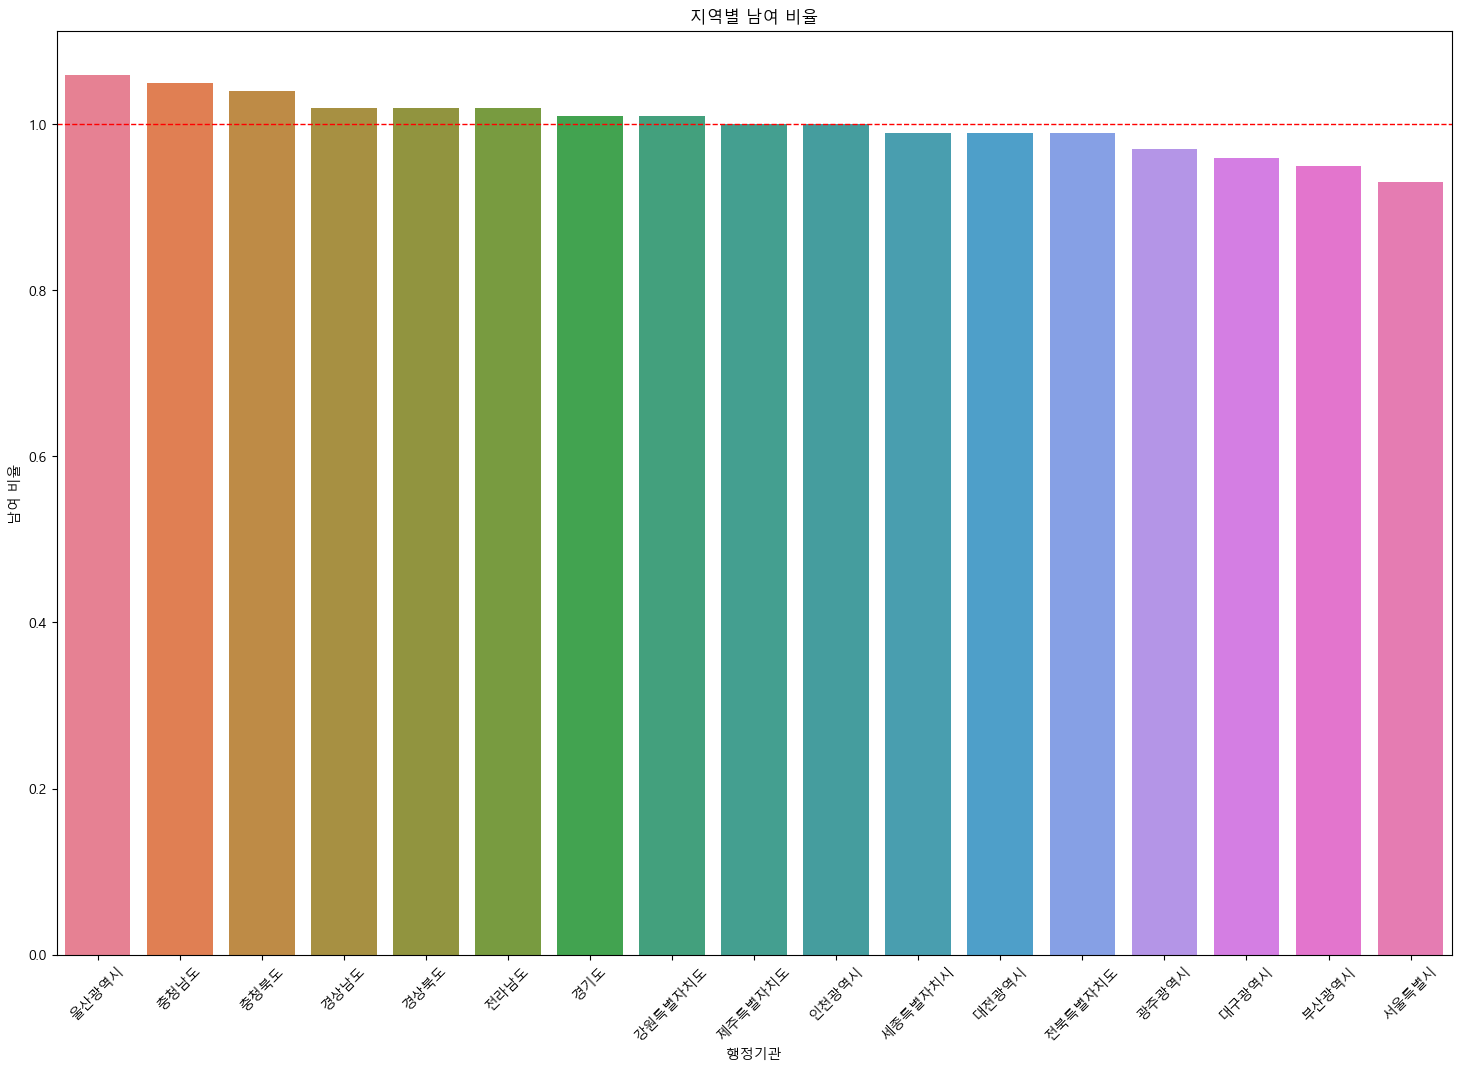

In [46]:
make_plot('남여 비율')